In [ ]:
# 1. Основные библиотеки
import re
from scipy.stats import mode
import numpy as np
import pandas as pd
import pickle   # сохранение модели

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

# 5. Для визуализации внешних картинок в ноутбуке
from IPython.display import Image

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

Mounted at /content/drive


In [ ]:
DATASET_PATH = '/content/drive/My Drive/GDAX.ETH-USD.csv'
df = pd.read_csv(DATASET_PATH, sep=',')
 df.head()

IndentationError: ignored

In [ ]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [ ]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 204.66 MB
Memory usage after optimization is: 85.28 MB
Decreased by 58.3%


In [ ]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [ ]:
X = pd.DataFrame(df[['<OPEN>', '<LOW>', '<HIGH>']])
y = pd.DataFrame(df['<CLOSE>'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

check_test = pd.DataFrame({
    "y_test": y_test["<CLOSE>"],
    "y_pred": y_pred.flatten(),
})

check_test.tail()
check_test["error"] = check_test["y_pred"] - check_test["y_test"]
check_test.head(15)

,y_test,y_pred,error
2954410,1520.74,1520.554563,-0.185437
206536,20.51,20.518898,0.008898
933604,466.02,466.001547,-0.018453
1476477,183.70,183.788228,0.088228
866545,527.92,527.903999,-0.016001
63647,11.97,11.973517,0.003517
1365873,252.35,252.457883,0.107883
832158,695.61,695.580560,-0.029440
2556642,3531.19,3533.004834,1.814834
1098945,135.67,135.553219,-0.116781


# **Airbnb**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Airbnb_Open_Data.csv', sep=',')

In [ ]:


def EDA_Airbnb():
    df.drop(['license', 'NAME', 'id'], axis=1, inplace=True)
    df['neighbourhood group'].replace({'brookln': 'Brooklyn'}, inplace=True)
    df['country'].fillna('United States', inplace=True)
    _replace_ = ['service fee', 'price']
    for i in _replace_:
      df[i].fillna('41', inplace=True)
    for i in range(df.shape[0]):
      for q in _replace_:
        a = re.sub("[^0-9]", "", str(df[q].iloc[i]))
        df[q].replace({df[q].iloc[i]: int(a)}, inplace=True)



def info_Airbnb():
    print(df.isna().sum())
    # print(type(df['service fee'].iloc[0]))


EDA_Airbnb()
# info_Airbnb()
df.isna().sum()
df.head()




,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,...,966,193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,...,142,28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,...,620,124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,...,368,74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN
4,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,...,204,41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host id                         102599 non-null  int64  
 1   host_identity_verified          102310 non-null  object 
 2   host name                       102193 non-null  object 
 3   neighbourhood group             102570 non-null  object 
 4   neighbourhood                   102583 non-null  object 
 5   lat                             102591 non-null  float64
 6   long                            102591 non-null  float64
 7   country                         102599 non-null  object 
 8   country code                    102468 non-null  object 
 9   instant_bookable                102494 non-null  object 
 10  cancellation_policy             102523 non-null  object 
 11  room type                       102599 non-null  object 
 12  Construction yea

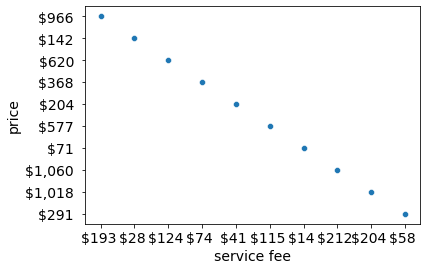

In [ ]:

sns.scatterplot(data=data[:10], x="service fee", y="price")

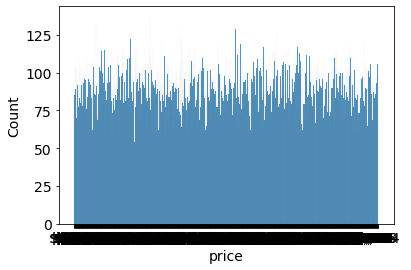

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Airbnb_Open_Data.csv")
sns.histplot(data["price"], binwidth=0.5)

# **Data_EDA**

In [ ]:
import numpy as np
import re
import os
import time
import datetime
import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error as mse, r2_score as r2,  mean_absolute_error, accuracy_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATAPATH = '/content/drive/My Drive/Airbnb_Open_Data.csv'
df = pd.read_csv(DATAPATH)

In [ ]:
DATAPATH = '/content/drive/My Drive/housing.csv'
df = pd.read_csv(DATAPATH)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  19918 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20041 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  id                  20640 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,id
count,20640.000000,20640.000000,19918.000000,20640.000000,20433.000000,20041.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.653630,2635.763081,537.870553,1425.418243,499.539680,3.870671,206855.816909,10319.500000
std,5.041408,94.903955,12.576796,2181.615252,421.385070,1135.185798,382.329753,1.899822,115395.615874,5958.399114
min,-124.350000,-13534.030000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,786.000000,280.000000,2.563400,119600.000000,5159.750000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000,10319.500000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1726.000000,605.000000,4.743250,264725.000000,15479.250000
max,122.030000,1327.130000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,20639.000000


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [ ]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age    722
total_rooms             0
total_bedrooms        207
population            599
households              0
median_income           0
median_house_value      0
ocean_proximity         0
id                      0
dtype: int64

In [ ]:
# StandardScaler = StandardScaler()
# MinMaxScaler = MinMaxScaler()
a = df['total_bedrooms'].copy()
df = df.drop(np.where(df.isna())[0])
df = df.loc[df['ocean_proximity'] != '-']
df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1)
df.drop(df[['id', 'ocean_proximity']], inplace=True, axis=1)
df = df.loc[df['housing_median_age']<=50]
df = df.loc[(df['longitude']<=-114) & (df['longitude']>=-124)]
df = df.loc[(df['latitude']>=32) & (df['longitude']<=42)]
# df = StandardScaler.fit_transform(df)
# df = MinMaxScaler.fit_transform(df)
# a = StandardScaler.fit_transform(a)
# a = MinMaxScaler.fit_transform(a)


X = df.drop(['total_bedrooms'], axis=1)
y = df['total_bedrooms']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = DecisionTreeClassifier()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.012923768495973029

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = GradientBoostingClassifier()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

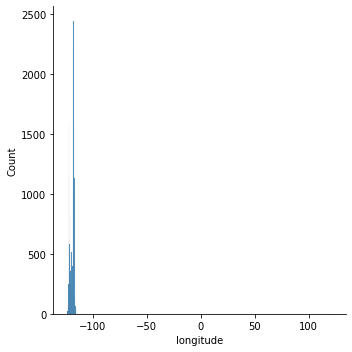

In [ ]:
sns.displot(df, x="longitude")

In [ ]:
y = df['total_bedrooms']
X = df.drop(['total_bedrooms'], axis=1)

In [ ]:
df = np.where((df['longitude']>=114) & (df['longitude']<=-124))

In [ ]:
def EDA_handler():
  global df
  _replace_ = ['service fee', 'price']

  a = df[df['host_identity_verified'].isna()]
  a.to_csv(r'/content/drive/My Drive/host_identity_verified.csv')

  df.drop(['license', 'house_rules', 'NAME', 'id', 'host id', 'host name', 'country', 'neighbourhood', 'country code'], axis=1, inplace=True)
  df = df.drop(np.where(df.isna())[0])

  df['neighbourhood group'].replace({'brookln': 'Brooklyn', 'manhatan': 'Manhattan'}, inplace=True)
  df = pd.concat([df, pd.get_dummies(df[['neighbourhood group', 'room type', 'cancellation_policy']])], axis=1)
  df['age_binary_cat'] = 0
  df.loc[df['instant_bookable'] == True, 'age_binary_cat'] = 1
  df['host_identity_verified_binary'] = 0
  df.loc[df['host_identity_verified'] == 'unconfirmed', 'host_identity_verified_binary'] = 1
  df.drop([ 'neighbourhood group', 'room type', 'cancellation_policy', 'host_identity_verified', 'instant_bookable'], axis=1, inplace=True)
  df["last review"] = pd.to_datetime(df["last review"], errors="coerce")
  for i in range(df.shape[0]):
    df['last review'].iloc[i] = time.mktime(df['last review'].iloc[i].timetuple())
  for i in range(df.shape[0]):
    for q in _replace_:
      a = re.sub("[^0-9]", "", str(df[q].iloc[i]))
      df[q].replace({df[q].iloc[i]: int(a)}, inplace=True)

EDA_handler()
#df2 = pd.read_csv'(/content/drive/My Drive/host_identity_verified.csv')

In [ ]:
X = pd.DataFrame(df.loc[:, :'age_binary_cat'])
y = pd.DataFrame(df['host_identity_verified_binary'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = DecisionTreeClassifier()
lr.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = lr.predict(X_test)
#y = np.round(y_pred.flatten())
check_test = pd.DataFrame({
    "y_test": y_test["host_identity_verified_binary"],
    "y_pred": y_pred.flatten(),
})

check_test.tail()

,y_test,y_pred
98133,1,1
61912,1,0
3219,1,1
313,0,0
101514,0,0


In [ ]:
accuracy_score(y_test, y_pred)

0.5056400581692411

In [ ]:
df.isna().sum()
df.head()

,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,...,neighbourhood group_Staten Island,room type_Entire home/apt,room type_Hotel room,room type_Private room,room type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,age_binary_cat,host_identity_verified_binary
0,40.64749,-73.97237,2020.0,966,193,10.0,9.0,1634601600.0,0.21,4.0,...,0,0,0,1,0,0,0,1,0,1
1,40.75362,-73.98377,2007.0,142,28,30.0,45.0,1653091200.0,0.38,4.0,...,0,1,0,0,0,0,1,0,0,0
3,40.68514,-73.95976,2005.0,368,74,30.0,270.0,1562284800.0,4.64,4.0,...,0,1,0,0,0,0,1,0,1,1
4,40.79851,-73.94399,2009.0,204,41,10.0,9.0,1542585600.0,0.10,3.0,...,0,1,0,0,0,0,1,0,0,0
5,40.74767,-73.97500,2013.0,577,115,3.0,74.0,1561161600.0,0.59,3.0,...,0,1,0,0,0,1,0,0,1,0


# **Iris**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [ ]:
iris = sns.load_dataset("iris")

In [ ]:
X = iris.drop('species', axis=1)
y = iris['species']

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, random_state=21, test_size=0.42)

In [ ]:
lr = GaussianNB()
lr.fit(Xtrain, Ytrain)
y_pred = lr.predict(Xtest)
np.around(accuracy_score(Ytest, y_pred), decimals=2)

0.94

# **Lung_Cancer**

In [ ]:
import numpy as np
import re
import os
import time
import datetime
import time
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error as mse, r2_score as r2,  mean_absolute_error, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/My Drive/survey lung cancer.csv')

In [ ]:
LabelEncoder = LabelEncoder()
StandardScaler = StandardScaler()



a = df.drop(['LUNG_CANCER'], axis = 1).copy()
df = pd.concat([df, pd.get_dummies(df['GENDER'])], axis=1)
df['LUNG_CANCER'] = LabelEncoder.fit_transform(df['LUNG_CANCER'])
df.drop(['GENDER'], axis=1, inplace=True)
a = df.drop(['LUNG_CANCER'], axis = 1).copy()
a = StandardScaler.fit_transform(a)

def Analyz():
  pass

#def Model():
X = df.drop(['LUNG_CANCER'], axis=1)
y = df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(a, y, test_size=0.2, random_state=42)
lr = DecisionTreeClassifier(random_state=1,
                               min_samples_leaf=5,
                               max_depth=5)
lr.fit(X_train, y_train)
y_pred_test = np.round(lr.predict(X_test))
y_pred_train = np.round(lr.predict(X_train))

print(f"Accuracy модели на обучающей выборке {accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy модели на тестовой выборке {accuracy_score(y_test, y_pred_test)}")



def Prediction():
  #test_list = [63, 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 0, 1]
  test_list = [63, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
  feature_cols = ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
        'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
        'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
        'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'F', 'M']
  df_test = pd.DataFrame(columns=feature_cols)
  df_test.loc[0] = test_list
  df_test.replace({'NO': 1, 'YES': 2}, inplace=True)
  # df_test = pd.concat([df_test, pd.get_dummies(df_test['GENDER'])], axis=1)
  # df_test.drop(['GENDER'], axis=1, inplace=True)
  #df_test = StandardScaler.fit_transform(df_test)
  label = lr.predict(df_test)
  proba = lr.predict_proba(df_test)
  return label[0], proba[0][label[0]]

# EDA()
# Model()
Prediction()



Accuracy модели на обучающей выборке 0.9109311740890689
Accuracy модели на тестовой выборке 0.9032258064516129


(1, 1.0)

In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/survey lung cancer.csv')
a = df1.drop(['LUNG_CANCER'], axis = 1).copy()
df1 = pd.concat([df1, pd.get_dummies(df1['GENDER'])], axis=1)
df1.replace({'NO': 1, 'YES': 2}, inplace=True)
df1.drop(['GENDER'], axis=1, inplace=True)
a = df1.drop(['LUNG_CANCER'], axis = 1).copy()
df1

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,F,M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,2,1,0
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,2,0,1
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,2,0,1
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,2,0,1


# **TraidingBot**

In [ ]:
#Загружаем библиотеки

#!pip install ipython
import time
from IPython.display import clear_output

import pandas as pd #Пандас
import matplotlib.pyplot as plt #Отрисовка графиков
from tensorflow.keras.utils import to_categorical
import numpy as np #Numpy
from tensorflow.keras.optimizers import Adam #Оптимизатор
from tensorflow.keras.models import Sequential, Model #Два варианты моделей
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D, MaxPooling1D, RepeatVector #Стандартные слои
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Нормировщики
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # для генерации выборки временных рядов
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler # проверить все
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt # Подключаем matplotlib
import numpy as np # Подключаем numpy
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")
# Рисовать графики сразу же
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
DATASET_PATH = '/content/drive/My Drive/GDAX.ETH-USD.csv'
data = pd.read_csv(DATASET_PATH, sep=',', header=None)

In [ ]:
step_in_the_future = 30      # какую запись угадываем (15 - что будет через 15 мин)
n_steps = 100                 # сколько дней назад анализируем для ответа
analyze_period_train = 100000 # сколько записей в обучающей выборке
analyze_period_test = 5000  # сколько записей в тестовой выборке

             #########################
             # Конфигурация неиронки #
             #########################

drop = 0.4    # значение для слоя DropOut
_Conv1d_ = 2  # множитель для слоя Conv1D
_Dense_ = 100 # множитель для слоя _Dense_

In [ ]:
del data[0],data[1],data[2],data[3],data[8] #,data[4],data[6],data[5]
data = data.drop(labels = [0],axis = 0)


data.rename(columns={7: 'Close'}, inplace=True)
data = data.astype('float64')


# считаем относительную доходность единицах на step_in_the_last шагов назад
for i in range(1, step_in_the_future + 1):
  indicator_name = 'Close_chng_%d' % (i)
  data[indicator_name] = data['Close'].pct_change(i) # относительная доходность единицах

data = data.dropna() # удаляем строки с NaN
  # Добавил разметку направления тренда
for i in range(1, step_in_the_future + 1):
  indicator_name = 'Close_chng_%d' % (i)
  indicator_name_new = 'Y_%d' % (i)
  data[indicator_name_new] = 0
  data.loc[data[indicator_name] > 0 , indicator_name_new] = 1
  data.loc[abs(data[indicator_name]) < 0.001 , indicator_name_new] = 2

for i in range(1, step_in_the_future + 1):
  indicator_name = 'Close_chng_%d' % (i)
  #del data[indicator_name]



Train = analyze_period_train+analyze_period_test

xTrain = []
xTrain_data = []
yTrain = []
data = data.values
for i in range(data.shape[0]-Train-step_in_the_future-n_steps,data.shape[0]-step_in_the_future-n_steps,1):
  data_X = data[ list(range(1+i, n_steps+1+i)) ]
  data_Y = data[n_steps+i+step_in_the_future][step_in_the_future+3+step_in_the_future]
  data_Y = to_categorical(data_Y, num_classes = 3)

  xTrain_data.append(data_X)

  """
  # Масштабируем только X
  """
  xScaler = StandardScaler()
  xScaler.fit(data_X)
  data_X = xScaler.transform(data_X)

  xTrain.append(data_X)
  yTrain.append(data_Y)

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)
xTrain_data = np.array(xTrain_data)

xTest = xTrain[ list(range(analyze_period_train, analyze_period_train+analyze_period_test-1)) ]
yTest = yTrain[ list(range(analyze_period_train, analyze_period_train+analyze_period_test-1)) ]
xTest_data = xTrain_data[ list(range(analyze_period_train, analyze_period_train+analyze_period_test-1)) ]




xTrain = xTrain[ list(range(1, analyze_period_train)) ]
yTrain = yTrain[ list(range(1, analyze_period_train)) ]
xTrain_data = xTrain_data[ list(range(1, analyze_period_train)) ]


lr = LogisticRegression()
lr.fit(xTrain, yTrain)

y_pred = np.round(lr.predict(xTest))
accuracy_score(yTest, y_pred)

In [ ]:
data['change'] = 0
for i in data:
  data.loc[data[4] < data[7], 'change'] = 1

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,change
0,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,0
1,GDAX.ETH-USD,1,20160518,031400,12.5000000,12.5000000,12.5000000,12.5000000,0,0
2,GDAX.ETH-USD,1,20160518,032500,12.5000000,13.0000000,12.5000000,13.0000000,1,1
3,GDAX.ETH-USD,1,20160518,033600,12.7500000,12.7500000,12.7500000,12.7500000,1,0
4,GDAX.ETH-USD,1,20160518,033800,12.7500000,13.0000000,12.7500000,13.0000000,5,1


# **MNIST GB**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [ ]:
X.shape

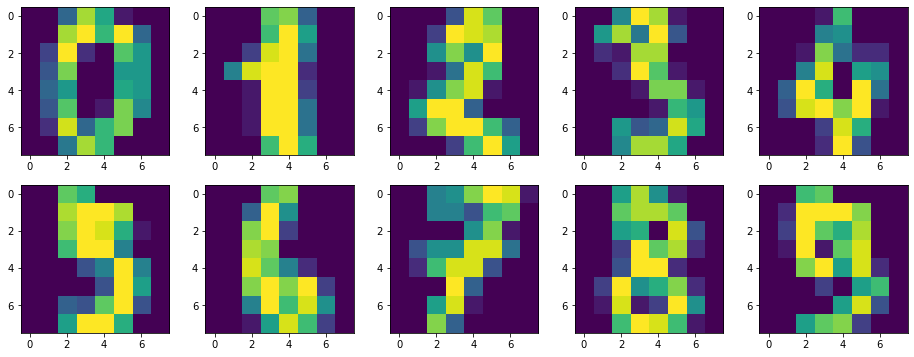

In [ ]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)

In [ ]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

In [ ]:
pred_train = model.predict(X_train)
train_preds = pd.DataFrame(pred_train, columns=['pred'])
train_preds['true'] = y_train
train_preds

,pred,true
0,7,7
1,6,6
2,0,0
3,4,4
4,3,3
...,...,...
1073,8,3
1074,7,7
1075,2,2
1076,7,7


In [ ]:
pred_test = model.predict(X_test)
test_preds = pd.DataFrame(pred_test, columns=['pred'])
test_preds['true'] = y_test
test_preds

,pred,true
0,6,6
1,9,9
2,3,3
3,7,7
4,6,2
...,...,...
714,2,2
715,2,2
716,1,1
717,8,8


In [ ]:
print(f"Accuracy модели на обучающей выборке {accuracy_score(y_train, pred_train)}")
print(f"Accuracy модели на тестовой выборке {accuracy_score(y_test, pred_test)}")

Accuracy модели на обучающей выборке 0.8580705009276438
Accuracy модели на тестовой выборке 0.8191933240611962


In [ ]:
model = DecisionTreeClassifier(random_state=1,
                               min_samples_leaf=10,
                               max_depth=8)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, random_state=1)

In [ ]:
!fusermount -u drive
!google-drive-ocamlfuse drive

/bin/bash: google-drive-ocamlfuse: command not found


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Dog&Cats/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/The_second_XRAY_dataset/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

import torch
import time
import cv2 # обработка изображений
import os
from PIL import Image

# функции для работы в нейронной сети
import torch.nn.functional as F
# разные инструменты для создания и обучения нейросети
import torch.optim as optim
import torch.nn as nn
from torch.autograd import Variable
import torchvision
from torchvision import models
# обработка изображений в нейросети
import torchvision.datasets as dset
import torchvision.transforms as transforms # преобразования изображений работы с нейронкой

import warnings
warnings.simplefilter("ignore")

# планируем решать все проблемы в GPU
device = torch.device("cuda")
# цикл обучения
def train(model, epoch, device = device, train_dataloader = None):
    model.train()
    for idx, (data, target) in enumerate(train_dataloader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)# прямой проход
        #оценим потери
        loss = criterion(output, target)
        loss.backward()# обратный шаг
        optimizer.step()# коррекция

        if idx % 10 == 0:
            print("epoch: ", epoch, "  process: ", int((idx / len(train_dataloader)) * 100),
                "%  Loss: ", loss.data.item())
    # сохраним модель
    torch.save(model.state_dict(), 'checpoint_epoch'+str(epoch)+'.pt')

# цикл теста
def test(model,device = device, test_dataloader = None):
    model.eval()
    test_loss = 0
    correct = 0
    print('Test:')
    with torch.no_grad():
        for idx,(data, target) in enumerate(test_dataloader):
            data, target = data.to(device), target.to(device)
            #прямой проход
            output = model(data)
            #потери теста
            test_loss += criterion(output, target).data.item()
            _, predicted = torch.max( output, 1)# определение класса объектов

        if idx % 10 == 0:
            print("epoch: ", epoch, "  process: ", int((idx / len(test_dataloader)) * 100),' test:', correct)

    test_loss /= len(test_dataloader.dataset)
    print("Average Loss: ", test_loss)




In [ ]:
class DataSet_cat_dog(torch.utils.data.dataset.Dataset):
    def __init__(self, mode=1, list_name=[],target=[],SIZE = 128 ):
        super(DataSet_cat_dog, self).__init__()
        self.dirs = list_name
        self.target = target
        self.size_im =SIZE
        self.mode = mode
        #print(self.target.shape)

    def __len__(self):
        return len(self.dirs)

    def __getitem__(self, index):
          img_dir, class_name = self.dirs[index],self.target[index]

          img = Image.open(img_dir) # читаем изображение из файла
          #преобразуем и изменяем(аугментируем)
          #img = cv2.imread(img_dir) # читаем изображение из файла
          #try:
          #  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          #except:
          #  pass
          #img = cv2.resize(img, (self.size_im,self.size_im))
          img = img.resize((self.size_im,self.size_im), Image.ANTIALIAS)
          img
          if self.mode:
            if np.random.randn(1)>0:
              img = img.transpose(Image.FLIP_LEFT_RIGHT)
              #img = cv2.flip(img, 1)
          img = np.array(img)
          img = img.transpose((2, 0, 1)).astype(np.float32) / 255.
          # создаем числовой код класса текущего изображения ([0, 1] - cat, [1,0] - dog)
          class_name = np.array([class_name, 1- class_name]).astype(np.float32)

          return img, class_name



In [ ]:
# проверяем размер и возможность открыть картинку
def image_test(list_im,target):
  out_list = []
  out_tar = []
  for name,targ in zip(list_im,target):
    try:
      #img = cv2.imread(name)
      #if img.shape[0]>50:
      if os.path.isfile(name) and (os.path.splitext(name)[-1] == '.jpeg'):
        out_list += [name]
        out_tar += [targ]
    except:
      pass
  return out_list, out_tar
#/content/drive/MyDrive/The second X-RAY dataset/test/NORMAL
#/content/drive/MyDrive/The second X-RAY dataset/train/PNEUMONIA
# каталоги для чтения картинок
train_path =path + 'train/'
test_path =path + 'test/'
list_tr_pneumonia = os.listdir(train_path+ 'PNEUMONIA')[:600]
list_tr_normal = os.listdir(train_path+ 'NORMAL')[:600]
list_test_pneumonia = os.listdir(test_path+ 'PNEUMONIA')[-600:]
list_test_normal = os.listdir(test_path+ 'NORMAL')[-600:]


# список имен файлов изображений для тренировки и тестов
# тренировочные изображения
train_name = [train_path+'PNEUMONIA/'+ name for name in list_tr_pneumonia] + [train_path+'NORMAL/'+ name for name in list_tr_normal]
train_target = [1]*len(list_tr_pneumonia)+[0]*len(list_tr_normal)
train_name,train_target = image_test(train_name,train_target)
# перемешаем классы
ind = np.arange(len(train_name))
np.random.shuffle(ind)
train_target = np.array(train_target)[ind.tolist()]
train_name = np.array(train_name)[ind.tolist()]
# тестовые изображения
val_name = [test_path+'PNEUMONIA/'+ name for name in list_test_pneumonia] + [test_path+'NORMAL/'+ name for name in list_test_normal]
val_target = [1]*len(list_test_pneumonia)+[0]*len(list_test_normal)
val_name,val_target = image_test(val_name,val_target)
# перемешаем классы
ind = np.arange(len(val_name))
np.random.shuffle(ind)
val_target = np.array(val_target)[ind.tolist()]
val_name = np.array(val_name)[ind.tolist()]


print("read data")
print("train size: {}".format(int(len(train_name))))
print("val size: {}".format(int(len(val_name))))

read data
train size: 1200
val size: 624


In [ ]:
# проверяем размер и возможность открыть картинку
def image_test(list_im,target):
  out_list = []
  out_tar = []
  for name,targ in zip(list_im,target):
    try:
      #img = cv2.imread(name)
      #if img.shape[0]>50:
      if os.path.isfile(name) and (os.path.splitext(name)[-1] == '.jpg'):
        out_list += [name]
        out_tar += [targ]
    except:
      pass
  return out_list, out_tar

# каталоги для чтения картинок
train_path =path + 'training_set/training_set/'
test_path =path + 'test_set/test_set/'
list_tr_cat = os.listdir(train_path+ 'cats')[:600]
list_tr_dog = os.listdir(train_path+ 'dogs')[:600]
list_test_cat = os.listdir(test_path+ 'cats')[-600:]
list_test_dog = os.listdir(test_path+ 'dogs')[-600:]


# список имен файлов изображений для тренировки и тестов
# тренировочные изображения
train_name = [train_path+'cats/'+ name for name in list_tr_cat] + [train_path+'dogs/'+ name for name in list_tr_dog]
train_target = [1]*len(list_tr_cat)+[0]*len(list_tr_dog)
train_name,train_target = image_test(train_name,train_target)
# перемешаем классы
ind = np.arange(len(train_name))
np.random.shuffle(ind)
train_target = np.array(train_target)[ind.tolist()]
train_name = np.array(train_name)[ind.tolist()]
# тестовые изображения
val_name = [test_path+'cats/'+ name for name in list_test_cat] + [test_path+'dogs/'+ name for name in list_test_dog]
val_target = [1]*len(list_test_cat)+[0]*len(list_test_dog)
val_name,val_target = image_test(val_name,val_target)
# перемешаем классы
ind = np.arange(len(val_name))
np.random.shuffle(ind)
val_target = np.array(val_target)[ind.tolist()]
val_name = np.array(val_name)[ind.tolist()]


print("read data")
print("train size: {}".format(int(len(train_name))))
print("val size: {}".format(int(len(val_name))))

read data
train size: 1200
val size: 1200


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Каталог с данными для обучения
train_dir = '/content/drive/MyDrive/The_second_XRAY_dataset/train'
# Каталог с данными для проверки
val_dir = '/content/drive/MyDrive/The_second_XRAY_dataset/val'
# Каталог с данными для тестирования
test_dir = '/content/drive/MyDrive/The_second_XRAY_dataset/test'
# Размеры изображения
img_width, img_height = 150, 150
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)
# Количество эпох
epochs = 5
# Размер мини-выборки
batch_size = 16
# Количество изображений для обучения
nb_train_samples = 5226
# Количество изображений для проверки
nb_validation_samples = 16
# Количество изображений для тестирования
nb_test_samples = 624

In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_name = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5226 images belonging to 2 classes.


In [ ]:
val_name = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 624 images belonging to 2 classes.


In [ ]:
class_ = ['dog','cat']

In [ ]:
# создаем загрузчики изображений для нашей сети

batch_size = 64 # размер пакета изображений

def train_test_Dataset(list_name,target,batch_size, aug = 0):
    dataset = DataSet_cat_dog(mode=aug, list_name=list_name,target=target,SIZE = 128 )
    dataloader = torch.utils.data.DataLoader( dataset,
                                            batch_size=batch_size,
                                            shuffle=True,
                                            num_workers=4)
    return dataloader

# загрузчики для тренировки и теста
train_dataloader = train_test_Dataset(train_name,train_target,batch_size, aug = 1)
test_dataloader = train_test_Dataset(val_name,val_target,batch_size, aug = 0)

In [ ]:
from numpy.random import permutation

In [ ]:
n = 5
for I_L in train_name:
  I,L = I_L
  plt.figure(figsize=(3*n,7))
  for i in range(n):
    plt.subplot(1,n,i+1)
    plt.imshow(I[i,:,:,:])
    #plt.title(class_[L.numpy().astype('int')[i,1]])
  plt.show()
  break

ValueError: ignored

In [ ]:
#Наша сборка
class CNN_fc(nn.Module):
    def __init__(self, input_size, n_feature, output_size, n_kernel_numb = 1):
        super(CNN_fc, self).__init__()
        self.n_feature = n_feature
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8*n_kernel_numb, kernel_size=5,  padding='same')
        self.conv2 = nn.Conv2d(8*n_kernel_numb, 16*n_kernel_numb, kernel_size=3,  padding='same')
        self.conv3 = nn.Conv2d(16*n_kernel_numb, 32*n_kernel_numb, kernel_size=3, padding='same' )
        self.conv4 = nn.Conv2d(32*n_kernel_numb, self.n_feature , kernel_size=3, padding='same')
        self.fc1 = nn.Linear(self.n_feature*(input_size // 16 )** 2, self.n_feature)
        self.fc2 = nn.Linear(self.n_feature, output_size)

    def forward(self, x, verbose=False):
        #print(':',x.shape)
        bs =   x.shape[-1] // 16
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)

        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)

        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)

        x = self.conv4(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)

        x = x.view(-1, bs*bs * self.n_feature)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)

        x = F.sigmoid(x)
        #x = F.softmax(x, dim=1)
        return x

In [ ]:
#Готовая сборка
from torchvision.models import resnet18
class ResNet(torch.nn.Module):
    def __init__(self, pretrained=True):
        super(ResNet, self).__init__()
        self.resnet = resnet18(pretrained=pretrained)
        self.resnet.fc = torch.nn.Linear(512, 2)# ориентированный на текущую задачу выход сети

    def forward(self, x):
        return  F.sigmoid(self.resnet(x))

In [ ]:
lr = 0.003

model = CNN_fc( 128, 128, 2, n_kernel_numb = 1).to(device)  #наша сеть
#model = ResNet().cuda() #наша сеть с переносом обучения
########################
# если уже есть какой-то результат обучения, что был сохранен, то его можно подгрузить
# model.load_state_dict(torch.load('checkpoint/checpoint_epoch.pt'))
# model.eval()
########################
criterion = nn.CrossEntropyLoss().cuda()
optimizer = optim.Adam( model.parameters(), lr=lr, weight_decay=1e-5)
print(model)

CNN_fc(
  (conv1): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv4): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (fc1): Linear(in_features=8192, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)


In [ ]:
import numpy.ndarray

In [ ]:
for epoch in range(10):
        start = time.time()
        train( model, epoch, train_dataloader = train_name )
        end = time.time()
        print("It takes ", end - start, " seconds")
        test(model,test_dataloader = test_dataloader)

In [ ]:
for I,Lt in test_dataloader:
  plt.imshow(I[0,:,:,:].permute(1, 2, 0)/I[0,:,:,:].max())

  I_gpu = I.to(device)
  L = model(I_gpu)
  k = int(L.to('cpu')[0,1]>0.5)
  kt = int(Lt.to('cpu').numpy()[0,1]>0.5)
  plt.title('model predict:' + class_[k]+': true:'+class_[kt])
  plt.show()
  break

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(L.to('cpu').detach()[:,1],label = 'predict')
plt.plot(Lt.to('cpu').detach()[:,1],'o',label = 'true')
plt.legend()
plt.grid()
plt.show()

In [ ]:
torch.save(model, 'model1.pth')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
# функции для работы в нейронной сети
import torch.nn.functional as F
# разные инструменты для создания и обучения нейросети
import torch.optim as optim
import torch.nn as nn
from torch.autograd import Variable
import torchvision
import torch
from torchvision import models
# обработка изображений в нейросети
import torchvision.datasets as dset
import torchvision.transforms as transforms # преобразования изображений работы с нейронкой

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Каталог с данными для обучения
train_dir = '/content/drive/MyDrive/The_second_XRAY_dataset/train'
# Каталог с данными для проверки
val_dir = '/content/drive/MyDrive/The_second_XRAY_dataset/val'
# Каталог с данными для тестирования
test_dir = '/content/drive/MyDrive/The_second_XRAY_dataset/test'
# Размеры изображения
img_width, img_height = 150, 150
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)
# Количество эпох
epochs = 5
# Размер мини-выборки
batch_size = 16
# Количество изображений для обучения
nb_train_samples = 5226
# Количество изображений для проверки
nb_validation_samples = 16
# Количество изображений для тестирования
nb_test_samples = 624

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5226 images belonging to 2 classes.


In [ ]:
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [ ]:
test_generator_new = datagen.flow_from_directory(
    '/content/drive/MyDrive/The_second_XRAY_dataset/testing_network',
    target_size=(img_width, img_height),
    batch_size=1,
    class_mode='binary')

Found 8 images belonging to 1 classes.


In [ ]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='binary')

Found 624 images belonging to 2 classes.


In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

In [ ]:
scores = model_new.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Аккуратность на тестовых данных: %.2f%%" % (scores[1]*100))

Аккуратность на тестовых данных: 76.39%


In [ ]:
torch.save(model, '/content/drive/MyDrive/model1.pth')

In [ ]:
model_new = torch.load('/content/drive/MyDrive/model1.pth')

In [ ]:
a[0]

array([0.99999726], dtype=float32)

In [ ]:
c

[0.4774450659751892, 0.8125]

In [ ]:
c = model_new.evaluate_generator(test_generator, 1)

In [ ]:
a = model_new.predict(test_generator)

In [ ]:
b = model_new.predict_proba(test_generator)

AttributeError: ignored

In [ ]:
import numpy as np

In [ ]:
import cv2

In [ ]:
test_path = '/content/drive/MyDrive/The_second_XRAY_dataset/test/NORMAL/IM-0045-0001.jpeg'
test_image = cv2.imread(test_path)
test_image = cv2.resize(test_image, (img_width, img_height))

In [ ]:
test_image.shape

(150, 150, 3)

In [ ]:
test_image = test_image / 255

In [ ]:
predictions = model_new.predict(np.array([test_image]))
predictions

array([[0.90312034]], dtype=float32)

In [ ]:
import tensorflow as tf

In [ ]:
main_score = tf.nn.softmax(predictions)

In [ ]:
class_names = ['PNEUMONIA', 'NORMAL']

In [ ]:
print(class_names[np.argmax(main_score)], 100 * np.max(main_score))

PNEUMONIA 100.0


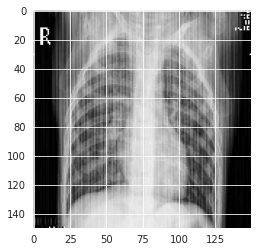

In [ ]:
for I,Lt in test_generator:
  plt.imshow(I[0,:,:,:])

  # #I_gpu = I.to(device)
  # #L = model_new()
  # k = int(model_new[0,1]>0.5)
  # kt = int(Lt.to('cpu').numpy()[0,1]>0.5)
  # plt.title('model predict:' + class_[k]+': true:'+class_[kt])
  plt.show()
  break

In [ ]:
import numpy as np
import re
import os
import time
import datetime
import time
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error as mse, r2_score as r2,  mean_absolute_error, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from google.colab import drive
import warnings

from collections import Counter
import joblib
from skimage.io import imread
from skimage.transform import resize

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

import joblib
from skimage.io import imread
from skimage.transform import resize

import cv2

warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
main_tuberculosis_img = cv2.imread('/content/drive/MyDrive/X-RAY/Tuberculosis/Tuberculosis-100.png', cv2.IMREAD_GRAYSCALE)

In [ ]:
X = np.array('/content/drive/MyDrive/Tuberculosis')
y = '/content/drive/MyDrive/Normal'

In [ ]:
main_tuberculosis_img.shape

(512, 512)

In [ ]:
for i in range(700):


array('/content/drive/MyDrive/Tuberculosis', dtype='<U35')

In [ ]:
def resize_all(src, pklname, include, width=150, height=80):


    height = height if height is not None else width

    data = dict()
    data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []

    pklname = f"{pklname}_{width}x{height}px.pkl"

    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)

            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)

        joblib.dump(data, pklname)


In [ ]:
data_path = '/content/drive/MyDrive/X-RAY'
pklname = 'human_body_covid'
include = {'Tuberculosis', 'Normal'}
width = 80
resize_all(src=data_path, pklname=pklname, width=width, include=include)

Tuberculosis
Normal


In [ ]:
data = joblib.load(f'{pklname}_{width}x{width}px.pkl')

print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))

Counter(data['label'])

number of samples:  1620
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)animal images in rgb
image shape:  (512, 512)
labels: ['No' 'Tubercul']


Counter({'Tubercul': 700, 'No': 920})

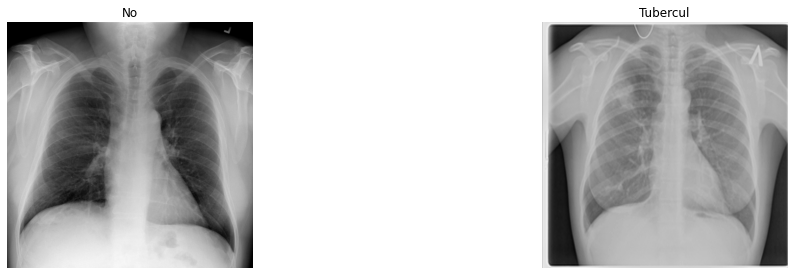

In [ ]:
labels = np.unique(data['label'])

fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()


for ax, label in zip(axes, labels):
    idx = data['label'].index(label)

    ax.imshow(data['data'][idx], cmap='gray')
    ax.axis('off')
    ax.set_title(label)

In [ ]:
X = np.array(data['data'])
y = np.array(data['label'])

ValueError: ignored

In [ ]:
data['data'][10].shape

(512, 512)

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

path = '/gdrive/MyDrive/geekbrain/PyTorch/BootCamp/'

# **Tinkoff.invest  MarketDataServicev**

In [ ]:
import tinvest

In [ ]:
!pip install tinvest

In [ ]:
MarketDataService = MarketDataService()
MarketDataService.GetOrderBook('', 100)

In [ ]:
dir(tinvest)

In [ ]:
a = pd.read_csv('/content/drive/My Drive/OrderLog20181229.csv', sep=';')

In [ ]:
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
drive.mount('/content/drive')
import pandas as pd


Mounted at /content/drive


In [ ]:
a.shape

(2024811, 10)

In [ ]:
b = a.loc[a['SECCODE']=='SBER']
b

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE
56,57,SBER,B,100000000000,57,1,175.00,10,NaN,NaN
59,60,SBER,S,100000000000,60,1,193.99,500,NaN,NaN
379,380,SBER,S,100000000000,380,1,190.00,50,NaN,NaN
394,395,SBER,S,100000000000,395,1,188.41,8410,NaN,NaN
426,427,SBER,B,100000000000,427,1,183.00,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024701,2024702,SBER,B,184431425955,886080,0,185.01,3970,NaN,NaN
2024729,2024730,SBER,S,184438848114,930716,0,187.03,200,NaN,NaN
2024750,2024751,SBER,B,184449073714,938083,0,186.12,30,NaN,NaN
2024755,2024756,SBER,B,184450552757,962841,0,185.48,830,NaN,NaN


In [ ]:
!pip install -i https://test.pypi.org/simple/ --extra-index-url=https://pypi.org/simple/ tinkoff-invest-openapi-client


# **Pneumonia**

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers
from keras import backend as K
import tensorflow as tf
import cv2

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D

In [ ]:
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/The_second_XRAY_dataset'
train = path + r'/train'
test = path + r'/test'

In [ ]:
image_resize = 128

In [ ]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split = 0.2,
    subset = 'training',
    seed = 125,
    image_size = (image_resize, image_resize),
    batch_size = 32
)

Found 6336 files belonging to 4 classes.
Using 5069 files for training.


In [ ]:
val_ds = keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    image_size = (image_resize, image_resize),
    batch_size = 32
)

Found 6336 files belonging to 4 classes.
Using 1267 files for validation.


In [ ]:
class_names = train_ds.class_names
class_names

['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

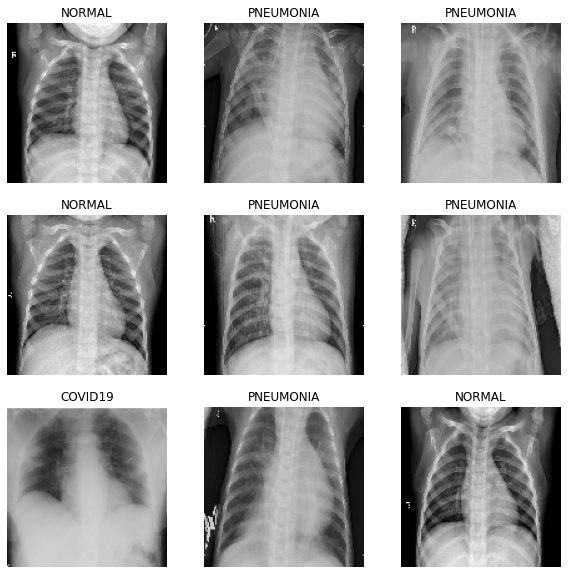

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [ ]:
normalization_layer = keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = 4
model = Sequential([
    keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_resize, image_resize, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [ ]:
def recall_m(y_true, y_pred):
  true__positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true__positives / (possible_positives + K.epsilon())
  return recall
def precision_m(y_true, y_pred):
  true__positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  precision = true__positives / (predicted_positives + K.epsilon())
  return precision
def f1_m(y_true, y_pred):
  precision = precision_m(y_true, y_pred)
  recall = recall_m(y_true, y_pred)
  return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model.compile(optimizer='adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy', recall_m, precision_m, f1_m])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [ ]:
epoches=30
history = model.fit(train_ds, validation_data=val_ds, epochs=epoches)

Epoch 1/30
159/159 [==============================] - 1426s 9s/step - loss: 0.2956 - accuracy: 0.8905 - recall_m: 2.0249 - precision_m: 2.0249 - f1_m: 2.0249 - val_loss: 0.2135 - val_accuracy: 0.9274 - val_recall_m: 1.9215 - val_precision_m: 1.9215 - val_f1_m: 1.9215
Epoch 2/30
159/159 [==============================] - 128s 795ms/step - loss: 0.1545 - accuracy: 0.9469 - recall_m: 2.0645 - precision_m: 2.0645 - f1_m: 2.0645 - val_loss: 0.1165 - val_accuracy: 0.9669 - val_recall_m: 2.0911 - val_precision_m: 2.0911 - val_f1_m: 2.0911
Epoch 3/30
159/159 [==============================] - 128s 794ms/step - loss: 0.1202 - accuracy: 0.9584 - recall_m: 2.0345 - precision_m: 2.0345 - f1_m: 2.0345 - val_loss: 0.1170 - val_accuracy: 0.9669 - val_recall_m: 1.9051 - val_precision_m: 1.9051 - val_f1_m: 1.9051
Epoch 4/30
159/159 [==============================] - 132s 819ms/step - loss: 0.0923 - accuracy: 0.9688 - recall_m: 2.0194 - precision_m: 2.0194 - f1_m: 2.0194 - val_loss: 0.0914 - val_accurac

In [ ]:
test_ds = keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(image_resize, image_resize),
    batch_size=32
)

Found 771 files belonging to 4 classes.


In [ ]:
model.evaluate(test_ds)

25/25 [==============================] - 221s 6s/step - loss: 3.8994 - accuracy: 0.7808 - recall_m: 1.6799 - precision_m: 1.6799 - f1_m: 1.6799


[3.8994204998016357,
 0.7808041572570801,
 1.6799306869506836,
 1.6799306869506836,
 1.6799306869506836]

In [ ]:
data_augmentation = keras.Sequential(
    [
      keras.layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(image_resize, image_resize, 3)),
      keras.layers.experimental.preprocessing.RandomRotation(0.1),
      keras.layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)

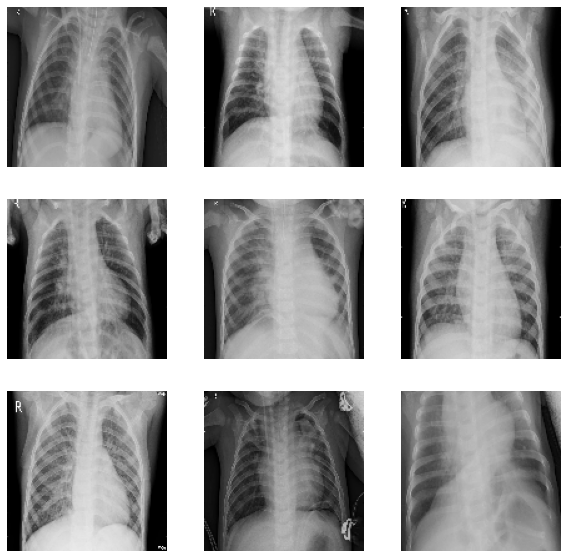

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmanted_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.axis('off')

In [ ]:
num_classes = 4
model2 = Sequential([
    data_augmentation,
    keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_resize, image_resize, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [ ]:
model2.compile(optimizer='adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy', recall_m, precision_m, f1_m])

In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                 

In [ ]:
history = model2.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
159/159 [==============================] - 547s 3s/step - loss: 0.6100 - accuracy: 0.7627 - recall_m: 1.8075 - precision_m: 1.8075 - f1_m: 1.8075 - val_loss: 0.3976 - val_accuracy: 0.8477 - val_recall_m: 1.8709 - val_precision_m: 1.8709 - val_f1_m: 1.8709
Epoch 2/20
159/159 [==============================] - 140s 870ms/step - loss: 0.3341 - accuracy: 0.8775 - recall_m: 1.8219 - precision_m: 1.8219 - f1_m: 1.8219 - val_loss: 0.2137 - val_accuracy: 0.9187 - val_recall_m: 1.8883 - val_precision_m: 1.8883 - val_f1_m: 1.8883
Epoch 3/20
159/159 [==============================] - 139s 864ms/step - loss: 0.2712 - accuracy: 0.9002 - recall_m: 1.8323 - precision_m: 1.8323 - f1_m: 1.8323 - val_loss: 0.2054 - val_accuracy: 0.9274 - val_recall_m: 1.8461 - val_precision_m: 1.8461 - val_f1_m: 1.8461
Epoch 4/20
159/159 [==============================] - 143s 891ms/step - loss: 0.2574 - accuracy: 0.9059 - recall_m: 1.8204 - precision_m: 1.8204 - f1_m: 1.8204 - val_loss: 0.1620 - val_accuracy

In [ ]:
model2.evaluate(test_ds)

25/25 [==============================] - 437s 17s/step - loss: 0.7454 - accuracy: 0.8016 - recall_m: 1.5985 - precision_m: 1.5985 - f1_m: 1.5985


[0.7454274296760559,
 0.801556408405304,
 1.5985435247421265,
 1.5985435247421265,
 1.5985435247421265]

In [ ]:
model.save('/content/drive/MyDrive/CNN.h5')

In [ ]:
 model2.save('/content/drive/MyDrive/CNN2.h5')

In [ ]:
new_model = keras.models.load_model('/content/drive/MyDrive/CNN2.h5', custom_objects={'recall_m':recall_m, 'precision_m':precision_m, 'f1_m':f1_m})

In [ ]:
import cv2

In [ ]:
#
test_path = '/content/drive/MyDrive/COVID_19/COVID19/COVID19(100).jpg'
test_image = cv2.imread(test_path)
test_image = cv2.resize(test_image, (image_resize, image_resize))

In [ ]:
test_image.shape

(128, 128, 3)

In [ ]:
predictions = new_model.predict(np.array([test_image]))
predictions

1/1 [==============================] - 0s 28ms/step


array([[ 3.735044 , -1.907579 ,  1.1951709, -1.4314716]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions)

In [ ]:
print(class_names[np.argmax(score)], 100*np.max(score))

COVID19 91.90125465393066


Text(0.5, 1.0, 'Предсказание COVID19')

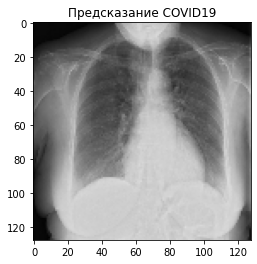

In [ ]:
plt.imshow(test_image)
plt.title('Предсказание ' + class_names[np.argmax(score)])

In [ ]:
num_classes = 4
model3 = Sequential([
    data_augmentation,
    keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_resize, image_resize, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes)
])

In [ ]:
model3.compile(optimizer='adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy', recall_m, precision_m, f1_m])

In [ ]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                  

In [ ]:
model3.evaluate(test_ds)

25/25 [==============================] - 111s 3s/step - loss: 0.6798 - accuracy: 0.8093 - recall_m: 1.8109 - precision_m: 1.8109 - f1_m: 1.8109


[0.6798484921455383,
 0.8093385100364685,
 1.8109021186828613,
 1.8109021186828613,
 1.8109017610549927]

In [ ]:
history = model3.fit(train_ds, validation_data=val_ds, epochs=15)

Epoch 1/15
159/159 [==============================] - 774s 5s/step - loss: 0.6674 - accuracy: 0.7351 - recall_m: 1.9488 - precision_m: 1.9488 - f1_m: 1.9488 - val_loss: 0.3068 - val_accuracy: 0.8895 - val_recall_m: 1.9910 - val_precision_m: 1.9910 - val_f1_m: 1.9910
Epoch 2/15
159/159 [==============================] - 765s 5s/step - loss: 0.3529 - accuracy: 0.8678 - recall_m: 1.9615 - precision_m: 1.9615 - f1_m: 1.9615 - val_loss: 0.2287 - val_accuracy: 0.9163 - val_recall_m: 1.9512 - val_precision_m: 1.9512 - val_f1_m: 1.9512
Epoch 3/15
159/159 [==============================] - 168s 1s/step - loss: 0.3073 - accuracy: 0.8862 - recall_m: 1.9047 - precision_m: 1.9047 - f1_m: 1.9047 - val_loss: 0.2151 - val_accuracy: 0.9179 - val_recall_m: 1.8845 - val_precision_m: 1.8845 - val_f1_m: 1.8845
Epoch 4/15
159/159 [==============================] - 164s 1s/step - loss: 0.2531 - accuracy: 0.9053 - recall_m: 1.8260 - precision_m: 1.8260 - f1_m: 1.8260 - val_loss: 0.1950 - val_accuracy: 0.9321 

# **Камеры видеонаблюдения**

In [ ]:
import pixellib
from pixellib.instance import instance_segmentation

segment_image = instance_segmentation()
segment_image.load_model("mask_rcnn_coco.h5")
segment_image.segmentImage("cycle.jpg", output_image_name="output_image.jpg")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processed image saved successfully in your current working directory.


# **Voice_assistant**

In [ ]:
!pip install torch
!pip install torchaudio
!pip install SoundFile
!pip install PySoundFile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
str(torchaudio.get_audio_backend())

# **GB Введение в нейронные сети**
# **Урок 2. Keras**

In [ ]:
!pip install mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.datasets import fashion_mnist
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
# Use scikit-learn to grid search the batch size and epochs
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [ ]:
model1 = Sequential(name="new_model")
model1.add(Dense(128, activation ='relu', input_shape=(784,)))
for i in range(2):
  model1.add(Dense(10+(10-i)*10, activation='tanh'))
model1.add(Dense(10, activation='softmax'))

In [ ]:
model1.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
model1.summary()

Model: "new_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 110)               14190     
                                                                 
 dense_6 (Dense)             (None, 100)               11100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def create_model(optimizer='adam'):
    model1 = Sequential([
      Dense(32, activation='relu', input_shape=(784,)),
      Dense(10, activation='softmax'),
      #Dense(10),
    ])

    # Compile the model.
    model1.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    return model1

model1 = create_model()

In [ ]:
# Train the model.
model1.fit(
  train_images,
  to_categorical(train_labels),
  epochs=100,
  batch_size=32,
)

# Evaluate the model.
model1.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Save the model to disk.
model1.save_weights('model1.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model1.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4381 - accuracy: 0.8741
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2525 - accuracy: 0.9268
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2123 - accuracy: 0.9377
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1890 - accuracy: 0.9447
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1728 - accuracy: 0.9490
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1605 - accuracy: 0.9526
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1496 - accuracy: 0.9567
Epoch 8/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1427 - accuracy: 0.9584
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1351 - accuracy: 0.9603
Epoch 10/100
1875/1875 [==============================] - 6s 3ms/step - l

In [ ]:
batch_size = [32]
epochs = [100]
optimizer = ['SGD', 'RMSprop', 'Adam']

In [ ]:
model1 = KerasClassifier(build_fn=create_model)
param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)
grid = GridSearchCV(estimator=model1, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(train_images, train_labels)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-24-9b336d6689f5>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model1 = KerasClassifier(build_fn=create_model)


KeyboardInterrupt: ignored

# **Введение в нейронные сети**
# **Урок 3. TensorFlow**

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils

# загрузка тренировочных и тестовых данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# конвертация чисел из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализация данных [0, 1]
x_train /= 255
x_test /= 255

# трансформация лейблов в one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

from keras.models import Sequential
from keras import models, layers
import keras

# инициализация пустой модели
model = Sequential()

# первый сверточный слой
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))

# второй пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# третий сверточный слой
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# четвертый пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# пятый полносвязный слой
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model.add(layers.Flatten())

# шестой полносвязный слой
model.add(layers.Dense(84, activation='tanh'))

# выходной слой с функцией активации softmax
model.add(layers.Dense(10, activation='softmax'))


# компилияция модели
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])


hist = model.fit(x=x_train,y=y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))


11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/100
469/469 [==============================] - 19s 11ms/step - loss: 0.6395 - accuracy: 0.8346 - val_loss: 0.3393 - val_accuracy: 0.9059
Epoch 2/100
469/469 [==============================] - 5s 10ms/step - loss: 0.3119 - accuracy: 0.9115 - val_loss: 0.2684 - val_accuracy: 0.9250
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 0.2554 - accuracy: 0.9270 - val_loss: 0.2236 - val_accuracy: 0.9360
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2198 - accuracy: 0.9369 - val_loss: 0.1967 - val_accuracy: 0.9457
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1945 - accuracy: 0.9452 - val_loss: 0.1753 - val_accuracy: 0.9497
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1748 - accuracy: 0.9503 - val_loss: 0.1608 - val_accuracy: 0.9542
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss:

In [ ]:
hist = model.fit(x=x_train,y=y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0080 - accuracy: 0.9992 - val_loss: 0.0336 - val_accuracy: 0.9881
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0080 - accuracy: 0.9992 - val_loss: 0.0329 - val_accuracy: 0.9880
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0078 - accuracy: 0.9992 - val_loss: 0.0329 - val_accuracy: 0.9879
Epoch 4/100
469/469 [==============================] - 3s 5ms/step - loss: 0.0077 - accuracy: 0.9992 - val_loss: 0.0330 - val_accuracy: 0.9879
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0076 - accuracy: 0.9992 - val_loss: 0.0326 - val_accuracy: 0.9881
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0075 - accuracy: 0.9993 - val_loss: 0.0335 - val_accuracy: 0.9882
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0074 - accuracy: 0.9992 - val_loss: 0.0331 - val_accuracy: 0.9880

# **Прогноз времнных рядов**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

In [ ]:
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data  = pd.read_csv('/content/drive/MyDrive/GDAX.ETH-USD.csv')

In [ ]:
train_data.pop('<TICKER>')
train_data.pop('<PER>')

0          1
1          1
2          1
3          1
4          1
          ..
2980624    1
2980625    1
2980626    1
2980627    1
2980628    1
Name: <PER>, Length: 2980629, dtype: int64

In [ ]:
train_data.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,20160518,31400,12.50,12.50,12.50,12.50,0
1,20160518,32500,12.50,13.00,12.50,13.00,1
2,20160518,33600,12.75,12.75,12.75,12.75,1
3,20160518,33800,12.75,13.00,12.75,13.00,5
4,20160518,33900,13.00,13.00,13.00,13.00,1


In [ ]:
train_data['<DATE>'] = pd.to_datetime(train_data['<DATE>'])
train_data.set_index('<DATE>', inplace=True)
train_data.head()

,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
<DATE>,,,,,,
1970-01-01 00:00:00.020160518,31400,12.50,12.50,12.50,12.50,0
1970-01-01 00:00:00.020160518,32500,12.50,13.00,12.50,13.00,1
1970-01-01 00:00:00.020160518,33600,12.75,12.75,12.75,12.75,1
1970-01-01 00:00:00.020160518,33800,12.75,13.00,12.75,13.00,5
1970-01-01 00:00:00.020160518,33900,13.00,13.00,13.00,13.00,1


In [ ]:
train_data['Year'] = train_data.index.year
train_data['Month'] = train_data.index.month
train_data['Weekday Name'] = train_data.index.day_name()
train_data.head()

,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,Year,Month,Weekday Name
<DATE>,,,,,,,,,
1970-01-01 00:00:00.020160518,31400,12.50,12.50,12.50,12.50,0,1970,1,Thursday
1970-01-01 00:00:00.020160518,32500,12.50,13.00,12.50,13.00,1,1970,1,Thursday
1970-01-01 00:00:00.020160518,33600,12.75,12.75,12.75,12.75,1,1970,1,Thursday
1970-01-01 00:00:00.020160518,33800,12.75,13.00,12.75,13.00,5,1970,1,Thursday
1970-01-01 00:00:00.020160518,33900,13.00,13.00,13.00,13.00,1,1970,1,Thursday


In [ ]:
train_data['HL_PCT'] = (train_data['<HIGH>'] - train_data['<LOW>']) / train_data['<LOW>'] * 100.0 # high-low percentage
train_data['PCT_change'] = (train_data['<CLOSE>'] - train_data['<OPEN>']) / train_data['<OPEN>'] * 100.0 # open-close percentage

In [ ]:
train_data.shape

(2980629, 11)

In [ ]:
train_data.isnull().sum()

<TIME>          0
<OPEN>          0
<HIGH>          0
<LOW>           0
<CLOSE>         0
<VOL>           0
Year            0
Month           0
Weekday Name    0
HL_PCT          0
PCT_change      0
dtype: int64

In [ ]:
df = train_data[['HL_PCT', 'PCT_change', '<CLOSE>','<VOL>']]

In [ ]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['<CLOSE>'].shift(-forecast_out)

149032


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [ ]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained
X.shape

(2831597, 4)

In [ ]:
df.dropna(inplace=True)
y = np.array(df['label'])
y.shape

(2831597,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
RandomForestRegressor()
rf_confidence = rf.score(X_test, y_test)
rf_confidence